## Outliers

Outliers are data points that we dont want to consider in our fit. The reasons can be different. It might be spurious signal falling on the detector, like glitches, or in principle valid signal that cannot be considered in the model at hand.

Here we present the same data as in the methanol example. See there for explanation of the construction of the spectrum. 

Part of that spectrum (around 500 GHz) shows a sinusoidal background signal, which is caused by aliasing in the deconvolution process. 

We want to fit the background with a sine function. All absorption lines in the spectrum are outliers and should be disregarded.

In this example we use the NestedSampler with a mixture of 2 error distributions: Gauss and Uniform

Demonstration: 
    1. Compound model of sine + constant
    2. NestedSampler 
    3. MixedErrorDistribution: Gauss + Uniform

Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import fits
from BayesicFitting import SineModel
from BayesicFitting import PolynomialModel
from BayesicFitting import NestedSampler
from BayesicFitting import MixedErrorDistribution
from BayesicFitting import GaussErrorDistribution
from BayesicFitting import UniformErrorDistribution
from BayesicFitting import formatter as fmt
from BayesicFitting import Tools
from BayesicFitting import plotFit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
# uncomment the next line to get the plots in a separate scalable 
# window.

#%matplotlib osx

%matplotlib inline

Read the data

In [3]:
hdu = fits.open( "data/Decgf-Methanol-1-5.fits" )

In [4]:
data = hdu[1].data
flux = data.field( 0 )
freq = data.field( 1 )
covr = data.field( 2 )


Select the part between 490 and 560 GHz, where the background is aliased.

140000


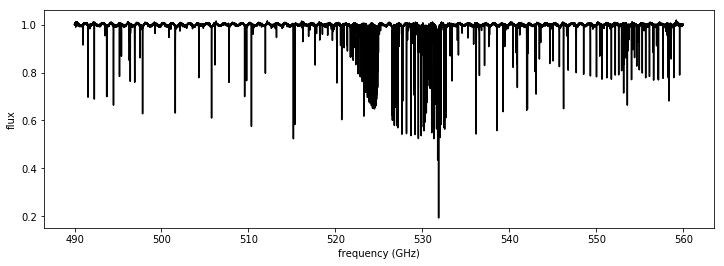

In [5]:
q = numpy.where( numpy.logical_and( freq > 490, freq < 560 ))
flx = flux[q]
frq = freq[q]
cov = covr[q]
print( len( flx ) )
plt.figure( "490 to 560", figsize=(12,4) )
plt.plot( frq, flx, 'k-')
plt.ylabel( "flux" )
plt.xlabel( "frequency (GHz)" )

plt.show()


Make a compound model consisting of a SineModel plus a constant: PolynomialModel( 0 ).

In [6]:
sm = SineModel()
lo = [0.9, -0.2, -0.2]
hi = [1.1, 0.2,  0.2]
sm.setLimits( lo, hi )
pm = PolynomialModel( 0 )
pm.setLimits( [0.99], [1.01] )
model = pm + sm


Construct a mixed error distribution consisting of a Gaussian kernel which should catch the sinusoidal background plus a broad Uniform error distribution that should catch and neutralize the absorption lines.

In [7]:
ged = GaussErrorDistribution( frq, flx, limits=[0.001,1])
ued = UniformErrorDistribution( frq, flx, limits=[0.1,10] )
ed = MixedErrorDistribution( ged, ued, limits=[0,1] )

#Tools.printclass( ed )
#Tools.printclass( ed.hyperpar[0] )
#Tools.printclass( ed.hyperpar[1] )
#Tools.printclass( ed.hyperpar[2] )

ns = NestedSampler( frq, model, flx, distribution=ed, seed=2222 )
ns.verbose = 2

evidence = ns.sample( )
pars = ns.parameters
#print( pars )
#print( ns.stdevs )
#print( ns.scale )
#print( evidence )

Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  Sine: f( x:p ) = p_2 * cos( 2PI * x * p_1 ) + p_3 * sin( 2PI * x * p_1 )
Using a Mixed error distribution : Gauss + Uniform with with unknown hypar
Moving the walkers with   GalileanEngine
Using no threads.
Iteration   logZ        H     LowL     npar    parameters
       0 -359677486.0      4.6 -359677481.4      7  [    1.004    0.946    0.096    0.170    0.002 ...]


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/BayesicFitting-1.0.7-py3.5.egg/BayesicFitting/source/MixedErrorDistribution.py:214: RuntimeWarning: divide by zero encountered in true_divide
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/BayesicFitting-1.0.7-py3.5.egg/BayesicFitting/source/MixedErrorDistribution.py:214: RuntimeWarning: overflow encountered in true_divide


     100 -62889.7      5.6 -62884.1      7  [    0.992    0.937    0.197   -0.164    0.303 ...]
     200  50098.4      6.6  50105.0      7  [    1.008    0.942   -0.150   -0.004    0.078 ...]
     300 103615.1      7.6 103622.7      7  [    0.993    0.973   -0.024    0.127    0.075 ...]
     400 152312.9      8.6 152321.5      7  [    1.002    1.087    0.009    0.023    0.077 ...]
     500 199004.3      9.6 199014.0      7  [    0.991    0.980   -0.036    0.007    0.051 ...]
     600 249998.9     10.6 250009.5      7  [    1.010    0.924   -0.013    0.017    0.016 ...]
     700 291860.1     11.6 291871.7      7  [    0.999    0.959   -0.019   -0.003    0.012 ...]
     800 330943.8     12.6 330956.5      7  [    0.991    0.981   -0.013    0.013    0.016 ...]
     900 368949.2     13.6 368962.8      7  [    0.995    0.991    0.009   -0.000    0.014 ...]
    1000 392439.2     14.6 392453.8      7  [    1.003    1.041    0.004    0.001    0.011 ...]
    1100 414846.2     15.6 414861.8     

    8700 521693.0     80.2 521776.5      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    8800 521693.1     80.3 521777.2      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    8900 521693.1     80.3 521777.8      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    9000 521693.1     80.4 521778.8      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    9100 521693.1     80.4 521779.5      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    9200 521693.1     80.5 521780.0      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    9300 521693.1     80.5 521780.4      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    9400 521693.1     80.5 521781.1      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    9500 521693.1     80.5 521781.6      7  [    0.999    1.000    0.004    0.002    0.003 ...]
    9600 521693.1     80.5 521782.1      7  [    0.999    1.000    0.004    0.003    0.003 ...]
    9700 521693.1     80.5 521782.6     

In [8]:
sl = ns.samples
param = sl.parameters
stdev = sl.stdevs
hypar = sl.hypars
sthyp = sl.stdevHypars
print( "Params ", fmt( param, max=None, format=" %10.5f" ) )
print( "Stdevs ", fmt( stdev, max=None, format=" %10.5f" ) )
print( "Hypars ", fmt( hypar, max=None, format=" %10.5f" ) )
print( "StdHyp ", fmt( sthyp, max=None, format=" %10.7f" ) )


Params  [    0.99940    0.99968    0.00430    0.00204]
Stdevs  [    0.00000    0.00001    0.00009    0.00016]
Hypars  [    0.00289    0.80301    0.91372]
StdHyp  [  0.0000039  0.0000596  0.0007171]


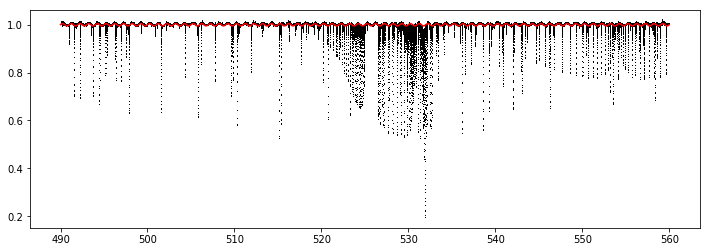

In [9]:
yfit = model.result( frq, param )
plt.figure( 1, figsize=(12,4) )
plt.plot( frq, flx, 'k,' )
plt.plot( frq, yfit, 'r-' )
plt.show()